In [55]:
import pandas as pd
import numpy as np

# load files
listings = pd.read_csv('data/cleansed_listings.csv')
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')
import matplotlib.pyplot as plt
%matplotlib inline

## Set Price Category

In [59]:
# Categorize label -- price
price_cat = []
for row in range(len(listings['price'])):
    if listings['price'][row]<= 250 and 0<=listings['price'][row]:
        price_cat.append('$0-250')
    elif listings['price'][row]<=500 and 250<listings['price'][row]:
        price_cat.append('$250-500')
    elif 500<listings['price'][row]:
        price_cat.append('$500-4000')

{'boxes': [<matplotlib.lines.Line2D at 0x11d9d86d8>],
 'caps': [<matplotlib.lines.Line2D at 0x11dc7f710>,
 'fliers': [<matplotlib.lines.Line2D at 0x11dd94128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11dd94390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11d9d8da0>,
  <matplotlib.lines.Line2D at 0x11ddd4390>]}

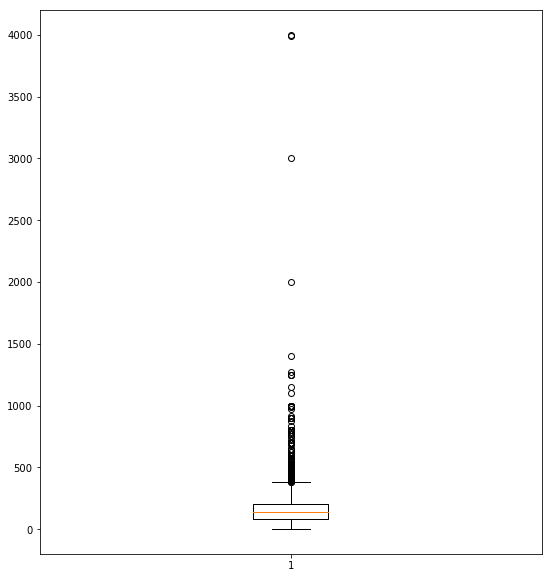

In [60]:
# box plot for label
plt.figure(figsize = (9,10))
plt.boxplot(listings['price'])

In [14]:
# Replace price with categorically label
listings['price'] = price_cat

(0, 365)

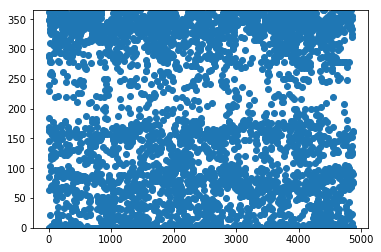

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# y - day, x - sum of nights
plt.scatter(range(4866), listings['sum_of_nights'])
plt.ylim((0,365))

## Set sum_of_nights Category

In [16]:
# 4 category for sum_of_nights feature
sum_of_nights_cat = []
for row in range(len(listings['sum_of_nights'])):
    if listings['sum_of_nights'][row]<= 365 and 300<listings['sum_of_nights'][row]:
        sum_of_nights_cat.append(0)
    elif listings['sum_of_nights'][row]<=300 and 200<listings['sum_of_nights'][row]:
        sum_of_nights_cat.append(1)
    elif listings['sum_of_nights'][row]<=200 and 100<listings['sum_of_nights'][row]:
        sum_of_nights_cat.append(2)
    elif listings['sum_of_nights'][row]<=100 and 0<=listings['sum_of_nights'][row]:
        sum_of_nights_cat.append(3)
listings['sum_of_nights'] = sum_of_nights_cat

In [17]:
# change type of sum_of_nights feature to float
listings['sum_of_nights'] = listings['sum_of_nights'].astype('float64') 

## Set host_response_time Category

In [19]:
# 5 categories for host_response_time
host_response_time_cat = []
for row in range(len(listings['host_response_time'])):
    if 'within an hour' in listings['host_response_time'][row]:
        host_response_time_cat.append(1)
    elif 'within a few hours' in listings['host_response_time'][row]:
        host_response_time_cat.append(2)
    elif 'within a day' in listings['host_response_time'][row]:
        host_response_time_cat.append(3)
    elif 'a few days or more' in listings['host_response_time'][row]:
        host_response_time_cat.append(4)
    else:
        host_response_time_cat.append(0)
listings['host_response_time'] = host_response_time_cat

## Set host_response_rate Category

In [21]:
# change type of host_response_rate from string to float
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '')
listings['host_response_rate'] = listings['host_response_rate'].astype('float64')/100 

(0, 1)

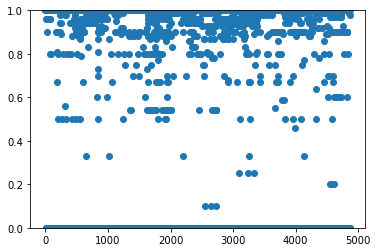

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(range(4866), listings['host_response_rate'])
plt.ylim((0,1))

In [23]:
# 3 categories fo response rate
responserate_cat = []
for row in range(len(listings['host_response_rate'])):
    if listings['host_response_rate'][row]<= 80 and 0<=listings['host_response_rate'][row]:
        responserate_cat.append(0)
    elif listings['host_response_rate'][row]<=90 and 80<listings['host_response_rate'][row]:
        responserate_cat.append(1)
    elif listings['host_response_rate'][row]<=100 and 90<listings['host_response_rate'][row]:
        responserate_cat.append(2)

In [24]:
# pick up all the features with object types in listings dataframe 
obj = listings.select_dtypes(include=['object']).copy()
obj.head()

,listing_url,name,summary,space,description,neighborhood_overview,picture_url,street,neighbourhood_cleansed,city,is_location_exact,property_type,room_type,amenities,price,instant_bookable,cancellation_policy
0,https://www.airbnb.com/rooms/20872145,Charming Boston Residential,Berber carpeting. The living room has two full...,It's on the second floor.,Berber carpeting. The living room has two full...,Roslindale is an amazing up and coming town in...,https://a0.muscache.com/im/pictures/3cf36714-5...,"Boston, MA, United States",Roslindale,Boston,t,Apartment,Private room,"{""Wireless Internet"",Gym,Heating,""Smoke detect...",$0-250,t,moderate
1,https://www.airbnb.com/rooms/13937181,Guest Room in Cozy Home,"Guest room available in cozy, well-lit home on...",0,"Guest room available in cozy, well-lit home on...",0,https://a0.muscache.com/im/pictures/02f47ff6-c...,"Boston, MA, United States",Roslindale,Boston,t,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",$0-250,f,flexible
2,https://www.airbnb.com/rooms/3575220,The Artist room in beautiful villa.,"My home is a villa in one of the friendliest, ...",The room is spacious and private. The house is...,"My home is a villa in one of the friendliest, ...","This a nice multicultural, family neighborhood.",https://a0.muscache.com/im/pictures/45068406/a...,"Boston, MA, United States",Roslindale,Boston,t,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",$0-250,f,moderate
3,https://www.airbnb.com/rooms/17419858,Large Bedroom in WestRoxbury/Rozzie,Beautiful private room on a quiet street with ...,0,Beautiful private room on a quiet street with ...,Quiet quiet quiet it's close to everything yet...,https://a0.muscache.com/im/pictures/404ac642-9...,"Boston, MA, United States",Roslindale,Boston,t,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$0-250,t,strict
4,https://www.airbnb.com/rooms/18202496,Bright and peaceful room in Roslindale Village,This is a spacious private room in a beautiful...,Perfect for couples or friends excited for day...,This is a spacious private room in a beautiful...,This is a fantastic area. Despite being a coll...,https://a0.muscache.com/im/pictures/878e31ee-f...,"Boston, MA, United States",Roslindale,Boston,t,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",$0-250,f,flexible


## Set Other Categories

In [25]:
# Using find_and_place method to change object to float or int
# room_type: Entire home/apt: 0, Private room: 1, Shared room: 2
# instant_bookable: f: 0, t: 1
# price: 0-250: 0, 250-500: 1, 500-4000: 2
# is_location_exact: f: 0, t: 1
cleanup_nums = {"room_type":{"Entire home/apt": 0, "Private room": 1,
                            "Shared room": 2},
                "instant_bookable": {"f": 0, "t": 1},
                "price":{"$0-250":0, "$250-500":1, "$500-4000":2},
                "is_location_exact": {"f": 0, "t": 1}}
obj.replace(cleanup_nums, inplace=True)
obj.dtypes

listing_url               object
name                      object
summary                   object
space                     object
description               object
neighborhood_overview     object
picture_url               object
street                    object
neighbourhood_cleansed    object
city                      object
is_location_exact          int64
property_type             object
room_type                  int64
amenities                 object
price                      int64
instant_bookable           int64
cancellation_policy       object
dtype: object

In [26]:
# features type: object -> category
obj["cancellation_policy"] = obj["cancellation_policy"].astype('category')
# add new columns with int or float types
obj["cancellation_policy_cat"] = obj["cancellation_policy"].cat.codes

In [27]:
# features type: object -> category
obj["neighbourhood_cleansed"] = obj["neighbourhood_cleansed"].astype('category')
# add new columns with int or float types
obj["neighbourhood_cleansed_cat"] = obj["neighbourhood_cleansed"].cat.codes


In [28]:
# features type: object -> category
obj["property_type"] = obj["property_type"].astype('category')

# add new columns with int or float types
obj["property_type_cat"] = obj["property_type"].cat.codes


In [29]:
# change the features from object to int or float 
listings['property_type'] = obj["property_type_cat"]
listings['neighbourhood_cleansed'] = obj["neighbourhood_cleansed_cat"]
listings['cancellation_policy'] = obj["cancellation_policy_cat"]
listings['room_type'] = obj["room_type"]
listings['instant_bookable'] = obj["instant_bookable"]
listings['price'] = obj["price"]
listings['is_location_exact'] = obj["is_location_exact"]

In [30]:
# We should drop the features with continuous data.
df_i = listings.drop(['id','city', 'listing_url', 'picture_url', 'neighborhood_overview', 
                    'summary','space', 'description', 'street', 'name','amenities','latitude','longitude'], axis = 1)
df_i.dtypes

host_response_time          int64
host_response_rate        float64
neighbourhood_cleansed       int8
is_location_exact           int64
property_type                int8
room_type                   int64
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
heating                     int64
wifi                        int64
pets_allowed                int64
Washer_dryer                int64
gym                         int64
sum_of_amenities            int64
price                       int64
instant_bookable            int64
cancellation_policy          int8
sum_of_nights             float64
dtype: object

## Split dataframe to features(X) & class(y)

In [31]:
df = df_i.drop(['price'], axis = 1)
X = df.values
y = df_i['price'].values
X.shape

(4866, 19)

## Feature Engineering

### Elminate Unimportant Features

Feature ranking:
feature sum_of_amenities (0.120594)
feature neighbourhood_cleansed (0.108615)
feature accommodates (0.100710)
feature bedrooms (0.086632)
feature beds (0.075293)
feature bathrooms (0.069471)
feature host_response_rate (0.059807)
feature sum_of_nights (0.056236)
feature cancellation_policy (0.050536)
feature property_type (0.047183)
feature room_type (0.047173)
feature host_response_time (0.046051)
feature pets_allowed (0.027954)
feature gym (0.025135)
feature instant_bookable (0.023302)
feature Washer_dryer (0.022895)
feature is_location_exact (0.018149)
feature heating (0.008095)
feature wifi (0.006168)


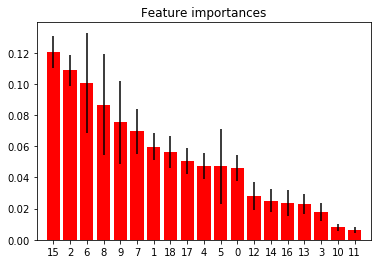

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
# print(importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

col_header = list(df.columns.values)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature %s (%f)" % (col_header[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [34]:
# drop unimportance features
df_final = df.drop(['wifi', 'heating', 'is_location_exact'], axis = 1)
df_final.head()

,host_response_time,host_response_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,pets_allowed,Washer_dryer,gym,sum_of_amenities,instant_bookable,cancellation_policy,sum_of_nights
0,2,1.0,18,0,1,2,1.0,0.0,1.0,0,0,1,13,1,1,2.0
1,1,1.0,18,9,1,2,2.0,1.0,1.0,0,0,0,17,0,0,2.0
2,1,1.0,18,9,1,1,2.5,1.0,1.0,0,1,0,14,0,1,1.0
3,1,1.0,18,0,1,2,2.0,1.0,1.0,0,1,1,21,1,2,3.0
4,3,1.0,18,9,1,2,1.0,1.0,1.0,0,0,0,17,0,0,3.0


### One-Hot-Encoding

In [61]:
df_1hot = df_final.copy()
X_dummies = pd.get_dummies(df_1hot, columns=df_1hot.columns, drop_first=True) #one hot encoding
X_dummies.shape

(4866, 196)

## Split dataset to X_train, X_test, y_train, y_test

In [36]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=0)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Start Machine Learning...

In [38]:
def report_results(grid):
    cv_keys = ('mean_test_score', 'std_test_score', 'params')
    print('mean_test_score +/ std_test_score, {params}') 
    for r, _ in enumerate(grid.cv_results_['mean_test_score']):
        bf = '*' if grid.cv_results_[cv_keys[0]][r]==grid.best_score_ else ' '
        print(bf+"%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

### Random Forest

In [39]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=12, random_state=5)
params = {'n_estimators': [2000,1500], 'max_depth': [12]}
RFgrid = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring = 'accuracy')
RFgrid.fit(X_train,y_train)
report_results(RFgrid)
scores = RFgrid.best_score_
print(scores)
print(RFgrid.best_params_)

mean_test_score +/ std_test_score, {params}
*0.869 +/- 0.00 {'max_depth': 12, 'n_estimators': 2000}
*0.869 +/- 0.00 {'max_depth': 12, 'n_estimators': 1500}
0.868731159222
{'max_depth': 12, 'n_estimators': 2000}


In [40]:
rf = RandomForestClassifier(max_depth=12, n_estimators = 2000, random_state=5)
rf.fit(X_train,y_train)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("mean score: ", scores.mean())

[ 0.86612022  0.8579235   0.86338798  0.86849315  0.86027397  0.87671233
  0.8739726   0.87912088  0.88461538  0.88705234]
mean score:  0.871767235412


### Ada Boost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=15, random_state=7)
params = {'n_estimators':[5, 10, 15, 20, 25]}
ABgrid = GridSearchCV(estimator=ab, param_grid=params, cv=5, scoring = 'accuracy')
ABgrid.fit(X_train, y_train)
report_results(ABgrid)
scores = ABgrid.best_score_
print(scores)
print(ABgrid.best_params_)

mean_test_score +/ std_test_score, {params}
 0.841 +/- 0.00 {'n_estimators': 5}
 0.848 +/- 0.00 {'n_estimators': 10}
 0.851 +/- 0.00 {'n_estimators': 15}
 0.849 +/- 0.00 {'n_estimators': 20}
*0.851 +/- 0.00 {'n_estimators': 25}
0.851192107427
{'n_estimators': 25}


In [42]:
ab = AdaBoostClassifier(n_estimators=25, random_state=7)
ab.fit(X_train,y_train)
scores = cross_val_score(ab, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("mean score: ", scores.mean())

[ 0.85245902  0.84972678  0.8442623   0.8630137   0.82739726  0.85479452
  0.85479452  0.86263736  0.85714286  0.8815427 ]
mean score:  0.854777100694


### Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=80, max_depth=4, min_samples_split=2)
params = {'max_features': [0.3, 0.5, 1], 'max_depth': [2, 4, 6], 'min_samples_leaf':[2, 4]}
GBgrid = GridSearchCV(estimator=gb, param_grid=params, cv=5, scoring = 'accuracy')
GBgrid.fit(X_train, y_train)
report_results(GBgrid)
scores = GBgrid.best_score_
print(scores)
print(scores.mean())

mean_test_score +/ std_test_score, {params}
 0.866 +/- 0.01 {'max_depth': 2, 'max_features': 0.3, 'min_samples_leaf': 2}
 0.866 +/- 0.01 {'max_depth': 2, 'max_features': 0.3, 'min_samples_leaf': 4}
 0.868 +/- 0.01 {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 2}
 0.869 +/- 0.01 {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 4}
 0.838 +/- 0.00 {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 2}
 0.837 +/- 0.00 {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 4}
 0.880 +/- 0.01 {'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 2}
 0.880 +/- 0.00 {'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 4}
 0.879 +/- 0.01 {'max_depth': 4, 'max_features': 0.5, 'min_samples_leaf': 2}
 0.878 +/- 0.00 {'max_depth': 4, 'max_features': 0.5, 'min_samples_leaf': 4}
 0.844 +/- 0.00 {'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 2}
 0.840 +/- 0.00 {'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 4}
 0.881 +/- 0.00 {'max_depth': 6, 'max_fe

In [44]:
gb = GradientBoostingClassifier(max_depth=6, max_features=0.3, min_samples_split=4)
gb.fit(X_train,y_train)
scores = cross_val_score(gb, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("mean score: ", scores.mean())

[ 0.88251366  0.87431694  0.87704918  0.8630137   0.8739726   0.88219178
  0.87945205  0.88736264  0.89010989  0.89256198]
mean score:  0.880254442935


### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced', C = 1, multi_class = 'multinomial',
                           solver = 'newton-cg')
logreg.fit(X_train, y_train)
params = {'C' :[0.8,0.9,1]}
LRgrid = GridSearchCV(estimator=logreg, param_grid=params, cv=5, scoring = 'accuracy')
LRgrid.fit(X_train, y_train)
report_results(LRgrid)
scores = LRgrid.best_score_
print(scores)
print(scores.mean())

mean_test_score +/ std_test_score, {params}
 0.758 +/- 0.01 {'C': 0.8}
*0.759 +/- 0.01 {'C': 0.9}
 0.759 +/- 0.01 {'C': 1}
0.758838037819
0.758838037819


In [46]:
logreg = LogisticRegression(class_weight = 'balanced', C = 0.9, multi_class = 'multinomial',
                           solver = 'newton-cg')
logreg.fit(X_train,y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("mean score: ", scores.mean())

[ 0.72677596  0.7568306   0.74043716  0.75068493  0.7369863   0.74520548
  0.74246575  0.81593407  0.76923077  0.80165289]
mean score:  0.758620390933


### Ensemble Method

In [47]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('RF', rf), ('AB', ab), 
                                   ('GB', gb), ('LG', logreg)],
                        voting='soft', weights = [1.5, 1, 2, 0.5])
clf.fit(X_train,y_train)
ac = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'accuracy')
print('mean_test_score = ', ac.mean())
print('std_test_score = ', ac.std())

mean_test_score =  0.882442558679
std_test_score =  0.00603836729092


In [50]:
import pickle
pkl_filename = "pickle_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf, file)
file.close()